In [ ]:
# Installing yahoos's yfinance
!pip install yfinance


In [ ]:
# Importing required libraries
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

In [ ]:
df_apple =  yf.download (tickers = "TSLA", start = "2019-02-27", 
                              end = "2023-04-28", interval = "1D", group_by = 'ticker', auto_adjust = True, threads = True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_apple.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,0.0,0.0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,0.0,0.0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,0.0,0.0
2023-05-04 00:00:00-04:00,164.889999,167.039993,164.309998,165.789993,81235400,0.0,0.0
2023-05-05 00:00:00-04:00,170.979996,174.300003,170.759995,173.570007,113316400,0.0,0.0


<Axes: xlabel='Date'>

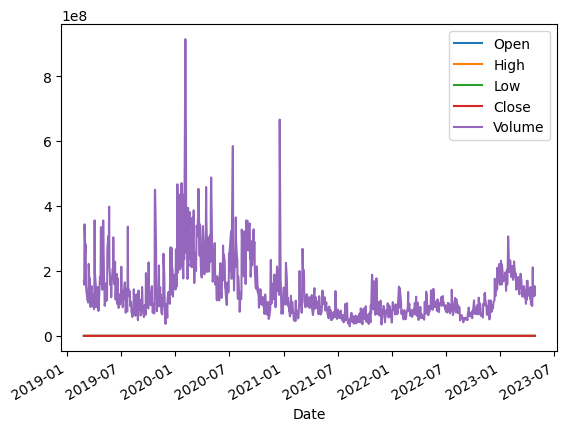

In [ ]:
df_apple.plot()

<Axes: xlabel='Date'>

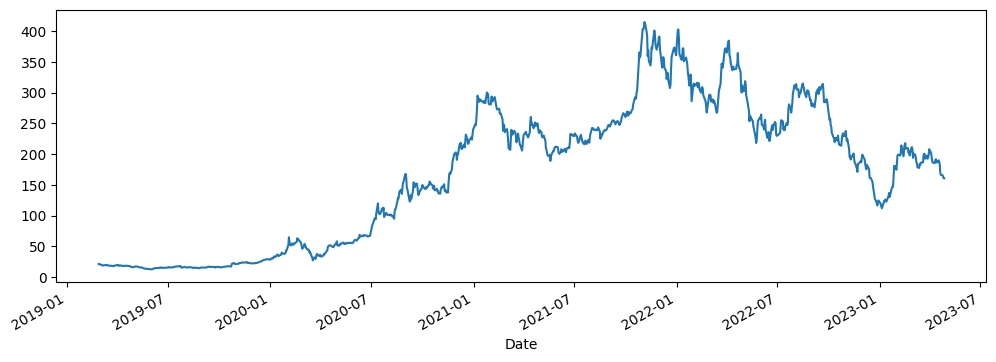

In [ ]:
df_apple['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

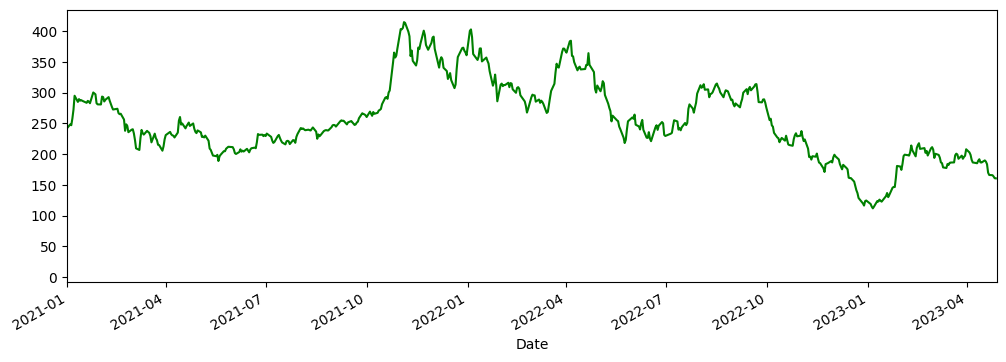

In [ ]:
# xlimit and coloring
df_apple['High'].plot(xlim=['2021-01-01','2023-04-28'], figsize=(12,4),color='green')

<Axes: xlabel='Date'>

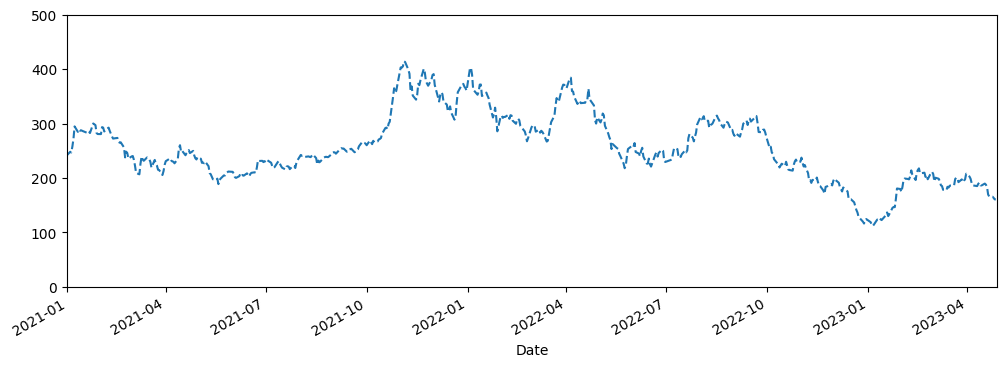

In [ ]:
# xlimit and ylimit and line style
df_apple['High'].plot(xlim=['2021-01-01','2023-04-28'], ylim=(0,500),ls='--',figsize=(12,4))

In [ ]:
df_apple.index

DatetimeIndex(['2019-02-27', '2019-02-28', '2019-03-01', '2019-03-04',
               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-11', '2019-03-12',
               ...
               '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27'],
              dtype='datetime64[ns]', name='Date', length=1050, freq=None)

In [ ]:
index = df_apple.loc['2022-01-01':'2022-09-01'].index #using loc for accessing rows

share_open = df_apple.loc['2022-01-01':'2022-09-01']['Open']

In [ ]:
share_open.head()

Date
2022-01-03    382.583344
2022-01-04    396.516663
2022-01-05    382.216675
2022-01-06    359.000000
2022-01-07    360.123322
Name: Open, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

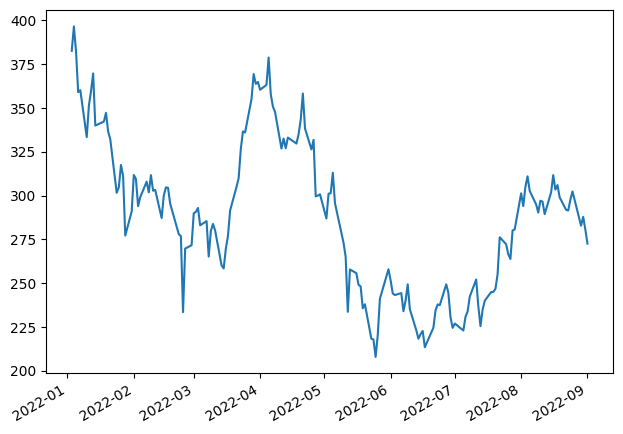

In [ ]:
figure,axis = plt.subplots()
plt.tight_layout() #preventing overlapping
figure.autofmt_xdate() # auto formatting xdate
axis.plot(index,share_open)

In [ ]:
## Datetime Index

In [ ]:
df_apple = df_apple.reset_index()
df_apple.head()

,level_0,Date,index,Open,High,Low,Close,Volume
0,0,2019-02-27,0,20.118668,21.086666,20.036667,20.982668,167758500
1,1,2019-02-28,1,21.261333,21.333332,20.720667,21.325333,157810500
2,2,2019-03-01,2,20.462667,20.475332,19.459999,19.652666,343671000
3,3,2019-03-04,3,19.874666,19.933332,18.851999,19.024000,256452000
4,4,2019-03-05,4,18.799999,18.933332,18.006666,18.436001,281470500


In [ ]:
# Setting Index
df_apple = df_apple.set_index('Date', drop=True)


In [ ]:
df_apple.drop(['level_0','index'], axis=1,inplace=True)

In [ ]:
df_apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-02-27,20.118668,21.086666,20.036667,20.982668,167758500
2019-02-28,21.261333,21.333332,20.720667,21.325333,157810500
2019-03-01,20.462667,20.475332,19.459999,19.652666,343671000
2019-03-04,19.874666,19.933332,18.851999,19.024000,256452000
2019-03-05,18.799999,18.933332,18.006666,18.436001,281470500


In [ ]:
## Datetime

In [ ]:
datetime(2022,5,29)

datetime.datetime(2022, 5, 29, 0, 0)

In [ ]:
# Current datetime
datetime.now()

datetime.datetime(2023, 5, 7, 11, 20, 2, 590777)

## Time Resampling

In [ ]:
# Rule 'A' means year end frequency
df_apple.resample(rule='A').min() 

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,12.073333,12.445333,11.799333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,92067000


In [ ]:
df_apple.resample(rule='A').max()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,29.000000,29.020666,28.423332,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,221923300
2023-12-31,211.759995,217.649994,206.110001,214.240005,306590600


<Axes: xlabel='Date'>

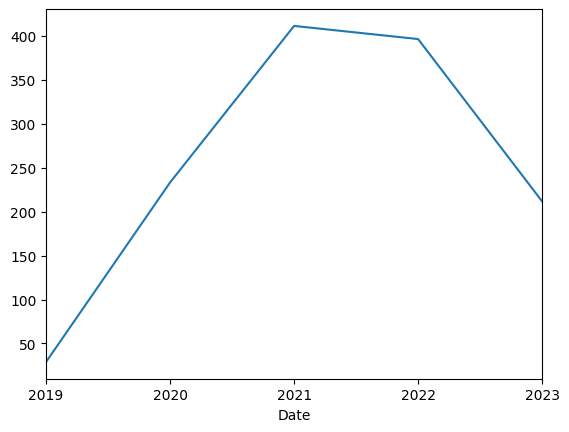

In [ ]:
df_apple.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

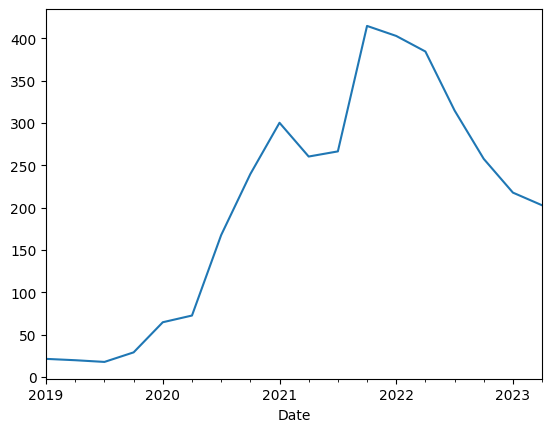

In [ ]:
## Quaterly start frequency
df_apple.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

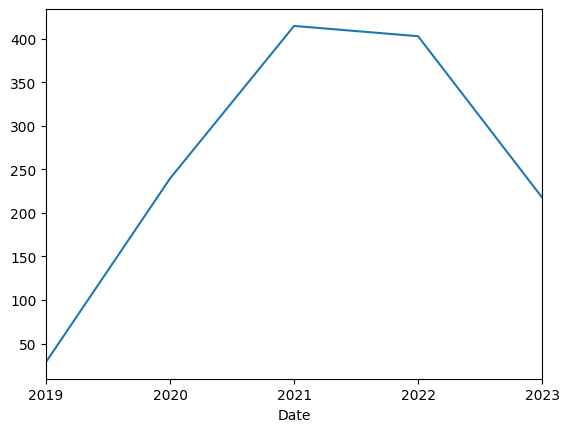

In [ ]:
## Business end frequency
df_apple.resample(rule='BA').max()['High'].plot()

<Axes: xlabel='Date'>

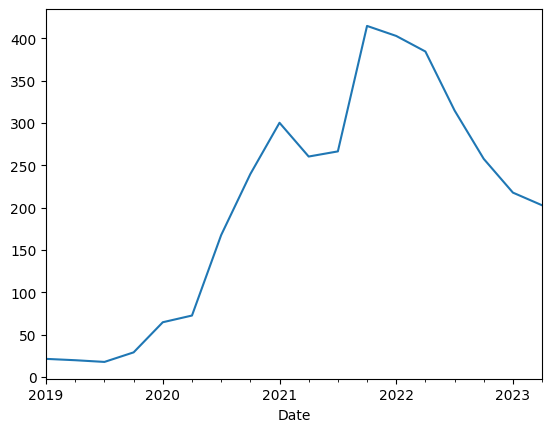

In [ ]:
## Business quaters end frequency
df_apple.resample(rule='BQS').max()['High'].plot()

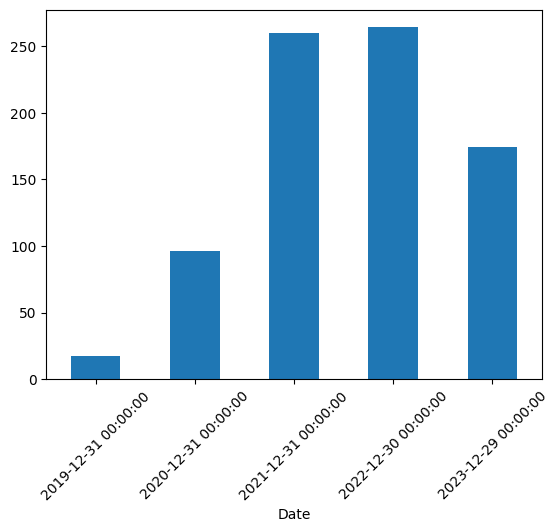

In [ ]:
##Plotting

df_apple['Open'].resample(rule='BA').mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-02-27,20.118668,21.086666,20.036667,20.982668,167758500
2019-02-28,21.261333,21.333332,20.720667,21.325333,157810500
2019-03-01,20.462667,20.475332,19.459999,19.652666,343671000
2019-03-04,19.874666,19.933332,18.851999,19.024000,256452000
2019-03-05,18.799999,18.933332,18.006666,18.436001,281470500


In [ ]:
# Rolling function

df_apple['High'].rolling(10).mean()

Date
2019-02-27           NaN
2019-02-28           NaN
2019-03-01           NaN
2019-03-04           NaN
2019-03-05           NaN
                 ...    
2023-04-21    183.523001
2023-04-24    181.578000
2023-04-25    179.006000
2023-04-26    175.914999
2023-04-27    173.312999
Name: High, Length: 1050, dtype: float64

In [ ]:
 df_apple['Open: 30 Days Rolling'] = df_apple['Open'].rolling(30).mean()

In [ ]:
df_apple.sample(5)

,Open,High,Low,Close,Volume,Open: 30 Days Rolling
Date,,,,,,
2019-08-27,14.382667,14.586667,14.135333,14.272000,81243000,15.585356
2020-11-10,140.029999,140.029999,132.009995,136.786667,90852600,142.782777
2021-12-14,315.000000,322.136658,310.000000,319.503326,70806300,364.295001
2020-02-07,48.703335,51.316666,48.666668,49.871334,255952500,36.646733
2022-11-30,182.429993,194.759995,180.630005,194.699997,109186400,200.474668


<Axes: xlabel='Date'>

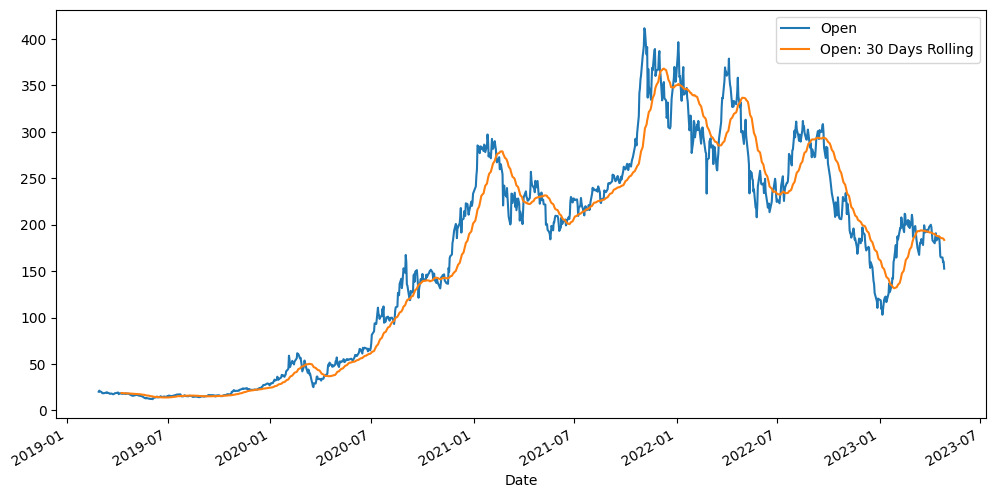

In [ ]:
df_apple[['Open','Open: 30 Days Rolling']].plot(figsize=(12,6))